In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from IPython.display import Image
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.metrics.cluster import rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward,dendrogram, linkage

#                                CCAI 323 Machine Learning-Project

In [2]:
def ecldist(xA,xB):
    s=0;
    for i in range(len(xA)):
        s=s+(xA[i]-xB[i])**2
    s=np.sqrt(s)
    return(s)

# Kemean

In [3]:
def KmeansPrj(data,nclust):
    #assumption 1 : row is number of data
    cond=1
    maxiter=16
    k1=np.amin(data,axis=0)
    k2=np.amax(data,axis=0)
    nd=np.shape(data)
    R=np.random.rand(nclust,nd[1])*(k2-k1)+k1
    label=np.zeros([nd[0],1])
    d=np.zeros([nclust])
    for it in range(maxiter):# Kmeans Iteration
        for i in range(nd[0]): # Distance Iteration Points
            xA=data[i,:]
            for j in range(nclust): # Distance Iteration Cluster
                xB=R[j,:]
                d[j]=ecldist(xA,xB)
            L=np.where(d==np.min(d))
            label[i]=L[0][0]
        for i in range(nclust): # Moving Cluster
            msk=np.where(label==i)
            Q=data[msk[0],:]
            if np.shape(Q)[0]!=0:
                R[i,:]=np.average(Q,axis=0)
            else:
                R[i,:]=np.random.rand(1,nd[1])*(k2-k1)+k1
        
    return label,R

# DBSCAN

In [4]:
def DBsc(X,eps,MinPts):
    L=np.shape(X)[0]
    N=[]
    d=np.zeros((L,L))
    # First Loop , Distance between points and each other
    for i in range(L):
        XA=X[i,:]
        for j in range(i+1,L):
            XB=X[j,:]
            d[i,j]=ecldist(XA,XB)
            d[j,i]=d[i,j]
    S=d<=eps
    A=[]
    # Points Neighbour 1
    for i in range(L):
        J= np.where((S[i,:])==True)
        A.append(J[0])
    # Inter points neighbour
    A2=[]
    for i in range(len(A)):
        q1=A[i]
        for j in range(i+1,len(A)):
            q2=A[j]
            k=np.isin(q1,q2)
            if sum(k)>0:
                q1=np.concatenate((q1,q2))
        q1=np.unique(q1)
        th=np.zeros((len(A2)))
        if len(A2)==0:
            A2.append(q1)
        else:
            for i2 in range(len(A2)):
                w1=A2[i2]
                k=np.isin(q1,w1)
                if sum(k)>0:
                    w1=np.concatenate((q1,w1))
                    w1=np.unique(w1)
                    A2[i2]=w1
                th[i2]=sum(k)
            if sum(th)==0 and np.shape(q1)!=(0,):
                A2.append(q1)
    # Labeling and delete minimum
    w=np.array([])
    A3=[]
    for i in A2:
        if len(i)<MinPts:
            w=np.concatenate((w,i))
        else:
            A3.append(i)
    A3.append(np.unique(w))
    lbl=len(A3)*np.ones((L))-1
    for i in range(len(A3)-1):
        k=A3[i]
        lbl[k]=i
    return A3,lbl

# data 1

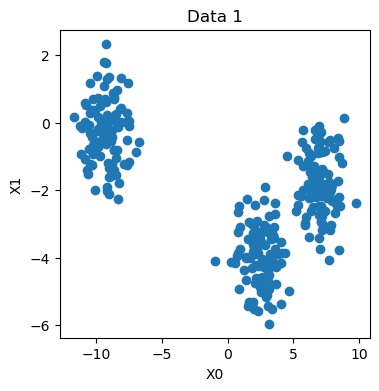

In [5]:
X,y=datasets.make_blobs(n_samples=300,random_state=62)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data 1')
plt.show()

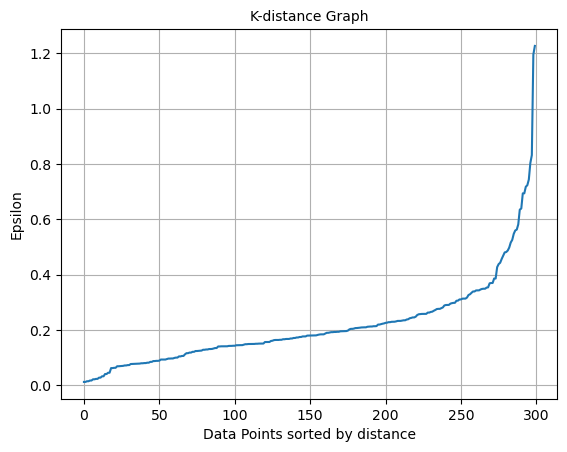

In [6]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure()
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.grid()
plt.show()

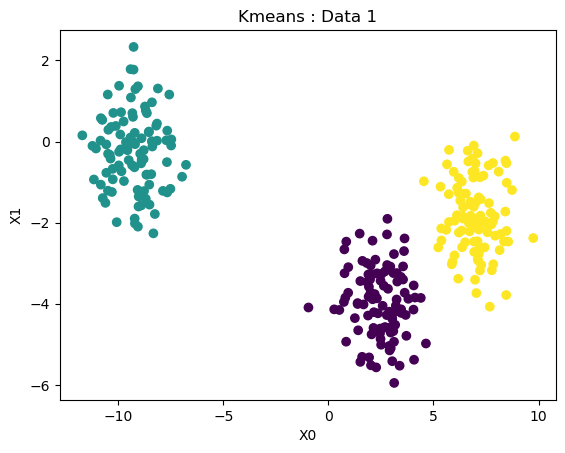

In [7]:
nClust=3
label,R=KmeansPrj(X,nClust)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=label)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Kmeans : Data 1')
plt.show()

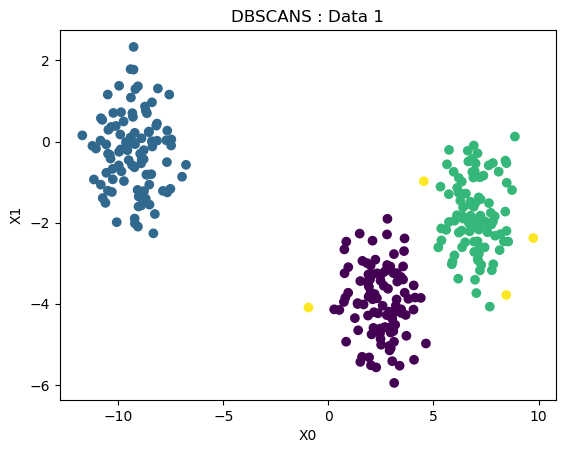

In [8]:
eps=0.8
MinPts=4
A3,lbl=DBsc(X,eps,MinPts)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=lbl)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('DBSCANS : Data 1')
plt.show()

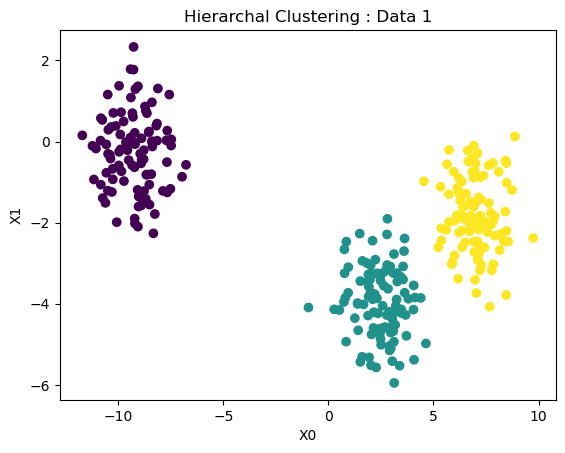

In [9]:
HC = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage ='ward').fit(X)

# Plotting Hierarchical Clustering
HCLabels = HC.labels_

# Plotting resulting clusters
plt.scatter(X[:,0],X[:,1],c=HCLabels)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Hierarchal Clustering : Data 1')
plt.show()

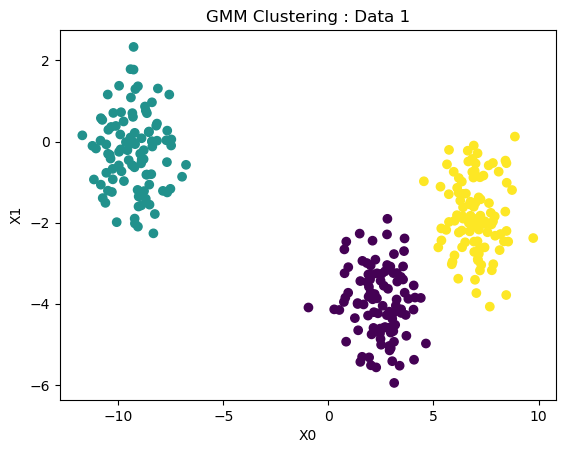

In [10]:
GMM = GaussianMixture(n_components=3).fit(X)
GMMlabels = GMM.predict(X)
plt.scatter(X[:,0], X[:,1],c=GMMlabels)
plt.title('GMM Clustering : Data 1')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [11]:
K_f1=f1_score(y, label.T[0], average='macro')
K_NMI=normalized_mutual_info_score(y, label.T[0])
K_R=rand_score(y,label.T[0])

DB_f1=f1_score(y, lbl, average='macro')
DB_NMI=normalized_mutual_info_score(y, lbl)
DB_R=rand_score(y,lbl)

HC_f1=f1_score(y, HCLabels, average='macro')
HC_NMI=normalized_mutual_info_score(y, HCLabels)
HC_R=rand_score(y,HCLabels)

GM_f1=f1_score(y, GMMlabels, average='macro')
GM_NMI=normalized_mutual_info_score(y, GMMlabels)
GM_R=rand_score(y,GMMlabels)
table = [['K-mean',K_f1, K_NMI, K_R], 
         ['Hierarchical',HC_f1, HC_NMI,HC_R], 
         ['DBSACN',DB_f1, DB_NMI,DB_R],
        ['GMM',GM_f1, GM_NMI,GM_R]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')


,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.000000,1.000000,1.000000
Hierarchical,0.333333,1.000000,1.000000
DBSACN,0.000000,0.968456,0.991237
GMM,0.000000,1.000000,1.000000


In [13]:
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)
df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']=df_rank['rank'].rank(ascending=True)
df_rank=df_rank.set_index('Models')
df_rank

,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean,3.0,2.0,2.0,2.5
Hierarchical,1.0,2.0,2.0,1.0
DBSACN,3.0,4.0,4.0,4.0
GMM,3.0,2.0,2.0,2.5


# data 2

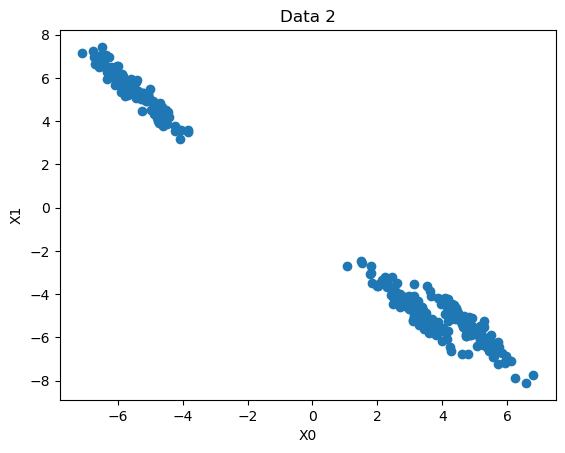

In [14]:
X2,y2=datasets.make_blobs(n_samples=300,random_state=62)
transformation=[[0.6,-0.6],[-0.4,0.8]]
X2=np.dot(X2,transformation)
plt.figure()
plt.scatter(X2[:,0],X2[:,1])
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data 2')
plt.show()



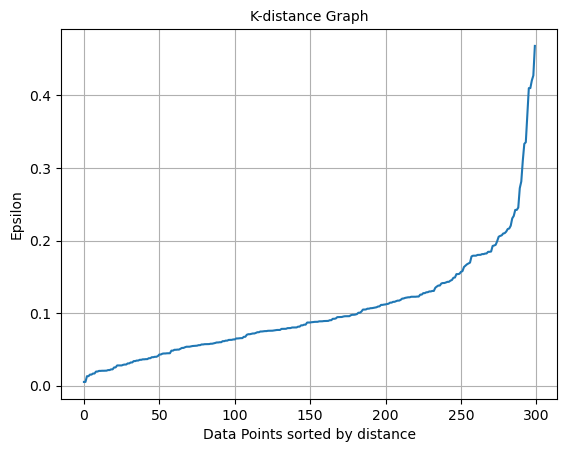

In [15]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X2)
distances2, indices2 = nbrs.kneighbors(X2)
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
plt.figure()
plt.plot(distances2)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.grid()
plt.show()

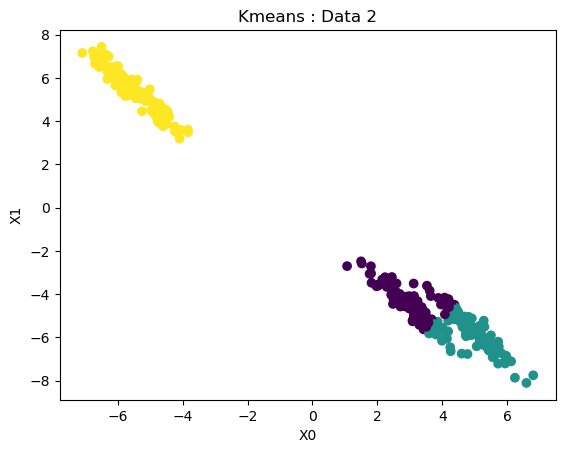

In [16]:
nClust=3
label,R=KmeansPrj(X2,nClust)
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=label)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Kmeans : Data 2')
plt.show()

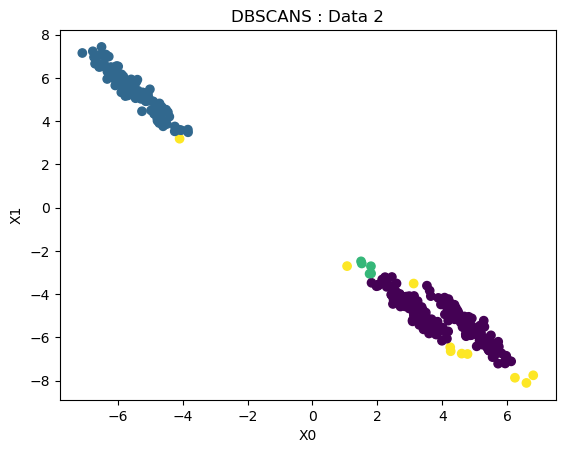

In [17]:
eps=0.35
MinPts=4
A3,lbl=DBsc(X2,eps,MinPts)
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=lbl)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('DBSCANS : Data 2')
plt.show()

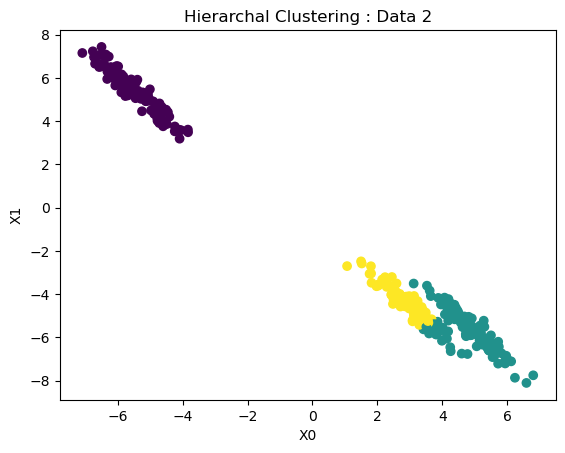

In [18]:
HC = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage ='ward').fit(X2)

# Plotting Hierarchical Clustering
HCLabels = HC.labels_

# Plotting resulting clusters
plt.scatter(X2[:,0],X2[:,1],c=HCLabels)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Hierarchal Clustering : Data 2')
plt.show()

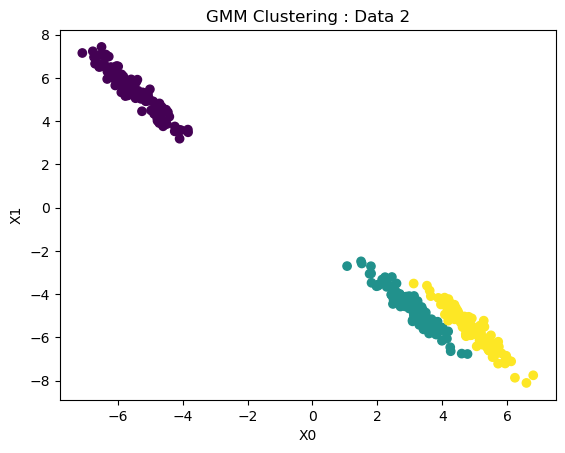

In [19]:
GMM = GaussianMixture(n_components=3).fit(X2)
GMMlabels = GMM.predict(X2)
plt.scatter(X2[:,0], X2[:,1],c=GMMlabels)
plt.title('GMM Clustering : Data 2')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [20]:
K_f1=f1_score(y2, label.T[0], average='macro')
K_NMI=normalized_mutual_info_score(y2, label.T[0])
K_R=rand_score(y2,label.T[0])

DB_f1=f1_score(y2, lbl, average='macro')
DB_NMI=normalized_mutual_info_score(y2, lbl)
DB_R=rand_score(y2,lbl)

HC_f1=f1_score(y2, HCLabels, average='macro')
HC_NMI=normalized_mutual_info_score(y2, HCLabels)
HC_R=rand_score(y2,HCLabels)

GM_f1=f1_score(y2, GMMlabels, average='macro')
GM_NMI=normalized_mutual_info_score(y2, GMMlabels)
GM_R=rand_score(y2,GMMlabels)
table = [['K-mean',K_f1, K_NMI, K_R], 
         ['Hierarchical',HC_f1, HC_NMI,HC_R], 
         ['DBSACN',DB_f1, DB_NMI,DB_R],
        ['GMM',GM_f1, GM_NMI,GM_R]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')


,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.269919,0.701315,0.860000
Hierarchical,0.915344,0.818054,0.902453
DBSACN,0.023810,0.656628,0.775318
GMM,0.333333,1.000000,1.000000


In [21]:
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)
df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']=df_rank['rank'].rank(ascending=True)
df_rank=df_rank.set_index('Models')
df_rank

,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean,3.0,3.0,3.0,3.0
Hierarchical,1.0,2.0,2.0,2.0
DBSACN,4.0,4.0,4.0,4.0
GMM,2.0,1.0,1.0,1.0


# data 3 

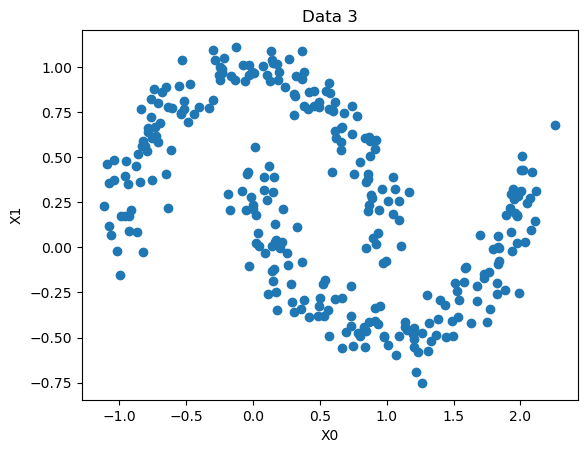

In [22]:
X3, y3 = datasets.make_moons(n_samples=300, noise=0.1,random_state=62)
plt.figure()
plt.scatter(X3[:,0],X3[:,1])
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data 3')
plt.show()

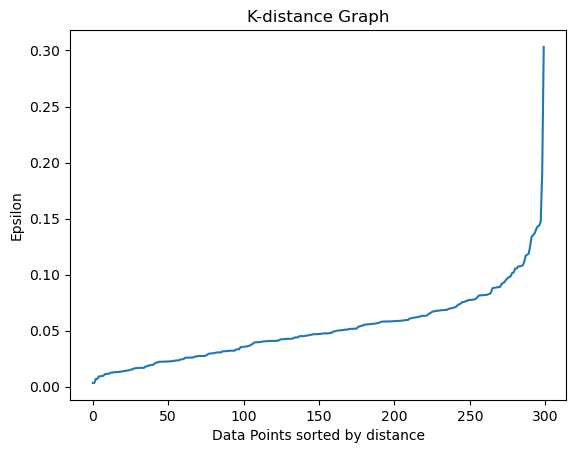

In [23]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X3)
distances3, indices3 = nbrs.kneighbors(X3)

# Plotting K-distance Graph
distances3 = np.sort(distances3, axis=0)
distances3 = distances3[:,1]
plt.plot(distances3)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

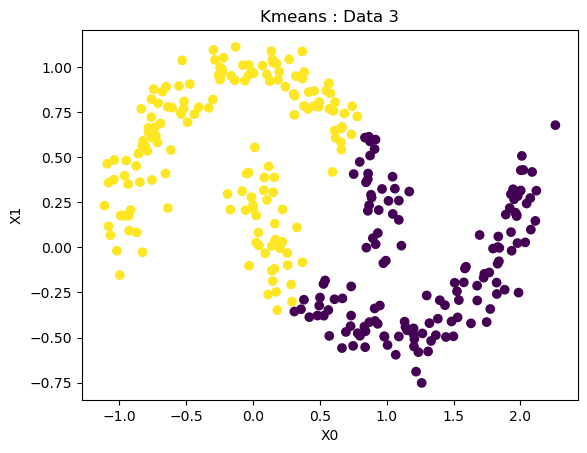

In [24]:
nClust=2
label,R=KmeansPrj(X3,nClust)
plt.figure()
plt.scatter(X3[:,0],X3[:,1],c=label)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Kmeans : Data 3')
plt.show()

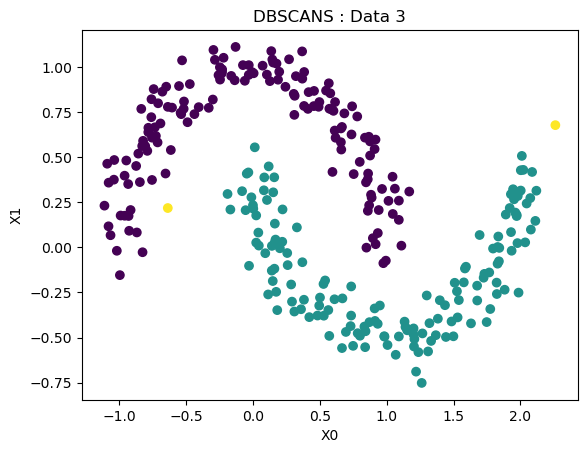

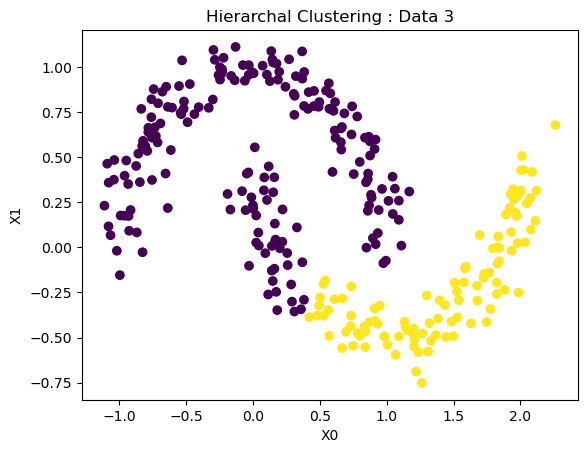

In [25]:
eps=0.15
MinPts=4
A3,lbl=DBsc(X3,eps,MinPts)
plt.figure()
plt.scatter(X3[:,0],X3[:,1],c=lbl)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('DBSCANS : Data 3')
plt.show()

HC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward').fit(X3)

# Plotting Hierarchical Clustering
HCLabels = HC.labels_

# Plotting resulting clusters
plt.scatter(X3[:,0],X3[:,1],c=HCLabels)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Hierarchal Clustering : Data 3')
plt.show()

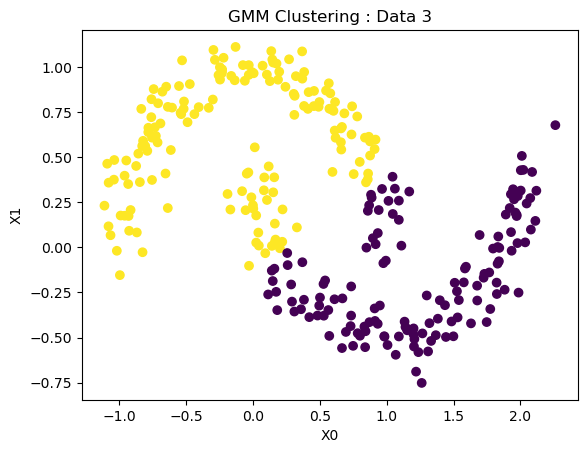

In [26]:
GMM = GaussianMixture(n_components=2).fit(X3)
GMMlabels = GMM.predict(X3)
plt.scatter(X3[:,0], X3[:,1],c=GMMlabels)
plt.title('GMM Clustering : Data 3')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [27]:
K_f1=f1_score(y3, label.T[0], average='macro')
K_NMI=normalized_mutual_info_score(y3, label.T[0])
K_R=rand_score(y3,label.T[0])

DB_f1=f1_score(y3, lbl, average='macro')
DB_NMI=normalized_mutual_info_score(y3, lbl)
DB_R=rand_score(y3,lbl)

HC_f1=f1_score(y3, HCLabels, average='macro')
HC_NMI=normalized_mutual_info_score(y3, HCLabels)
HC_R=rand_score(y3,HCLabels)

GM_f1=f1_score(y3, GMMlabels, average='macro')
GM_NMI=normalized_mutual_info_score(y3, GMMlabels)
GM_R=rand_score(y3,GMMlabels)
table = [['K-mean',K_f1, K_NMI, K_R], 
         ['Hierarchical',HC_f1, HC_NMI,HC_R], 
         ['DBSACN',DB_f1, DB_NMI,DB_R],
        ['GMM',GM_f1, GM_NMI,GM_R]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')


,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.256197,0.003049,0.499398
Hierarchical,0.271669,0.000726,0.484326
DBSACN,0.284983,0.003960,0.501159
GMM,0.261538,0.002602,0.499130


In [28]:
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)
df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']=df_rank['rank'].rank(ascending=True)
df_rank=df_rank.set_index('Models')
df_rank

,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean,4.0,2.0,2.0,2.0
Hierarchical,2.0,4.0,4.0,4.0
DBSACN,1.0,1.0,1.0,1.0
GMM,3.0,3.0,3.0,3.0


# data 4

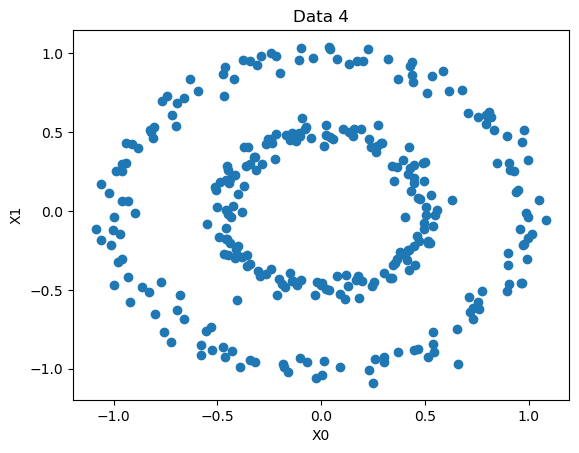

In [29]:
X4, y4 = datasets.make_circles(n_samples=300,factor=.5, noise=.05,random_state=62)
plt.figure()
plt.scatter(X4[:,0],X4[:,1])
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Data 4')
plt.show()

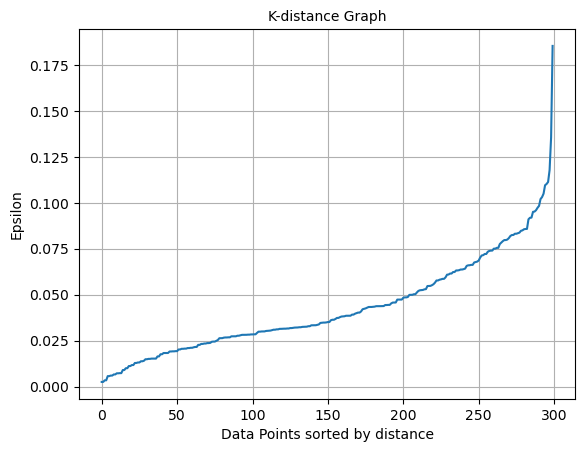

In [30]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X4)
distances4, indices4 = nbrs.kneighbors(X4)
distances4 = np.sort(distances4, axis=0)
distances4 = distances4[:,1]
plt.figure()
plt.plot(distances4)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.grid()
plt.show()

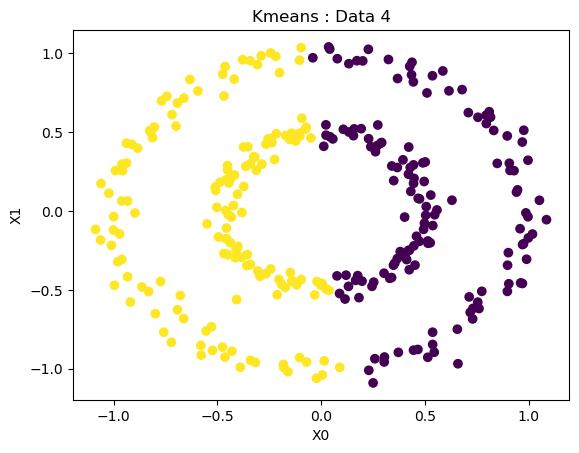

In [31]:
nClust=2
label,R=KmeansPrj(X4,nClust)
plt.figure()
plt.scatter(X4[:,0],X4[:,1],c=label)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Kmeans : Data 4')
plt.show()

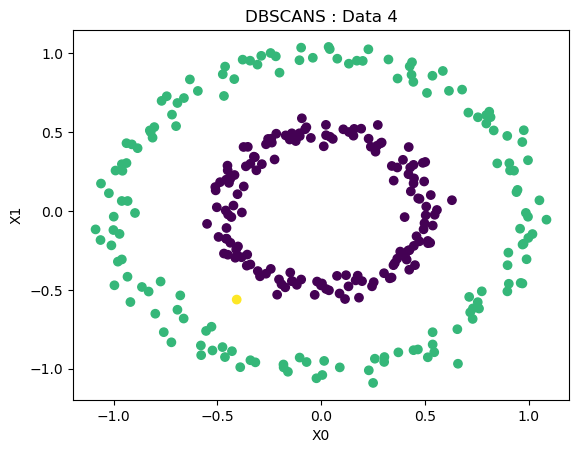

In [32]:
eps=0.15
MinPts=4
A3,lbl=DBsc(X4,eps,MinPts)
plt.figure()
plt.scatter(X4[:,0],X4[:,1],c=lbl)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('DBSCANS : Data 4')
plt.show()

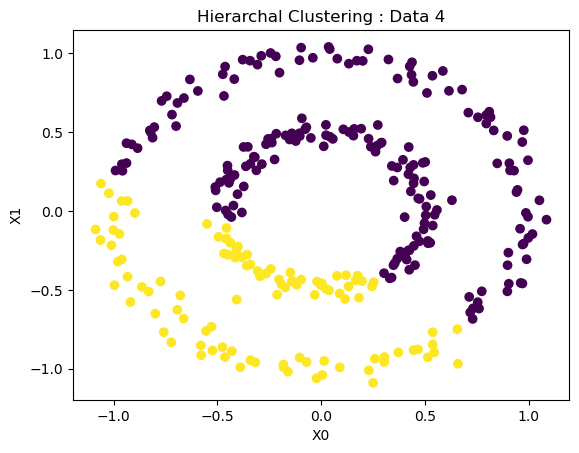

In [33]:
HC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage ='ward').fit(X4)

# Plotting Hierarchical Clustering
HCLabels = HC.labels_

# Plotting resulting clusters
plt.scatter(X4[:,0],X4[:,1],c=HCLabels)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Hierarchal Clustering : Data 4')
plt.show()

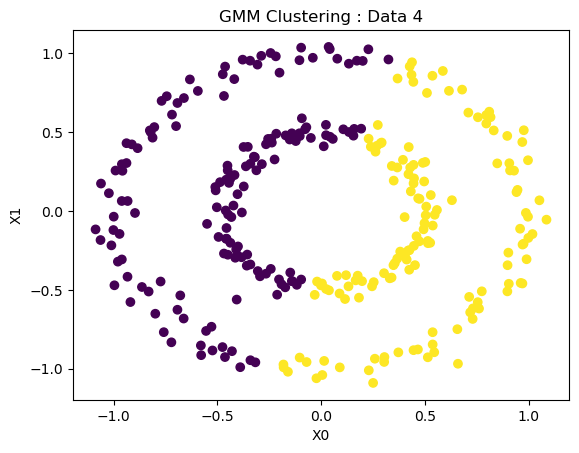

In [34]:
GMM = GaussianMixture(n_components=2).fit(X4)
GMMlabels = GMM.predict(X4)
plt.scatter(X4[:,0], X4[:,1],c=GMMlabels)
plt.title('GMM Clustering : Data 4')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [35]:
K_f1=f1_score(y4, label.T[0], average='macro')
K_NMI=normalized_mutual_info_score(y4, label.T[0])
K_R=rand_score(y4,label.T[0])

DB_f1=f1_score(y4, lbl, average='macro')
DB_NMI=normalized_mutual_info_score(y4, lbl)
DB_R=rand_score(y4,lbl)

HC_f1=f1_score(y4, HCLabels, average='macro')
HC_NMI=normalized_mutual_info_score(y4, HCLabels)
HC_R=rand_score(y4,HCLabels)

GM_f1=f1_score(y4, GMMlabels, average='macro')
GM_NMI=normalized_mutual_info_score(y4, GMMlabels)
GM_R=rand_score(y4,GMMlabels)
table = [['K-mean',K_f1, K_NMI, K_R], 
         ['Hierarchical',HC_f1, HC_NMI,HC_R], 
         ['DBSACN',DB_f1, DB_NMI,DB_R],
        ['GMM',GM_f1, GM_NMI,GM_R]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank.set_index('Models')


,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.295948,0.004529,0.500914
Hierarchical,0.276204,0.002417,0.485217
DBSACN,0.083534,0.004881,0.499955
GMM,0.236979,0.004848,0.500736


In [36]:
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank['F-measures']=df_rank['F-measures'].rank(ascending=False)
df_rank['NMI']=df_rank['NMI'].rank(ascending=False)
df_rank['Rand Statistic']=df_rank['Rand Statistic'].rank(ascending=False)
df_rank['rank'] = df_rank.mean(axis=1)
df_rank['rank']=df_rank['rank'].rank(ascending=True)
df_rank=df_rank.set_index('Models')
df_rank

,F-measures,NMI,Rand Statistic,rank
Models,,,,
K-mean,1.0,3.0,1.0,1.0
Hierarchical,2.0,4.0,4.0,4.0
DBSACN,4.0,1.0,3.0,3.0
GMM,3.0,2.0,2.0,2.0
